# Importing packages

In [2]:
from utils.clustering import *
import pandas as pd

from utils.preprocessing import *
import matplotlib.pyplot as plt

from utils.preprocessing import *
from utils.fourier import *
from utils.dim_reduction import *
from utils.plotting import *
from utils.anomaly_detection import *

In [3]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'Arial',
    'legend.fontsize': 13,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

# Importing dataset

In [5]:
df = pd.read_csv("datasets/sensors2/reducedDF.csv")
df

,PC1,PC2
0,-2.122777,0.277135
1,-2.233705,0.206017
2,-2.241807,0.142868
3,-2.105496,0.092320
4,-1.866048,0.051282
...,...,...
3981,-1.273627,-0.011049
3982,-1.166257,0.004097
3983,-1.286239,0.089486
3984,-1.705114,0.292003


Intializing a Isolation Forest class

In [6]:
ifo = iforest(df)

Now, we can use create the model and predict the anomalies

In [9]:
ifo.create_model()
labeled_data = ifo.predict_anomalies(df)
labeled_data

,PC1,PC2,classification,scores
0,-2.122777,0.277135,True,0.204059
1,-2.233705,0.206017,True,0.219255
2,-2.241807,0.142868,True,0.220060
3,-2.105496,0.092320,True,0.226318
4,-1.866048,0.051282,True,0.242519
...,...,...,...,...
3981,-1.273627,-0.011049,True,0.243891
3982,-1.166257,0.004097,True,0.248005
3983,-1.286239,0.089486,True,0.245722
3984,-1.705114,0.292003,True,0.225660


We can see in the classification column whether a point is a anomaly or not.

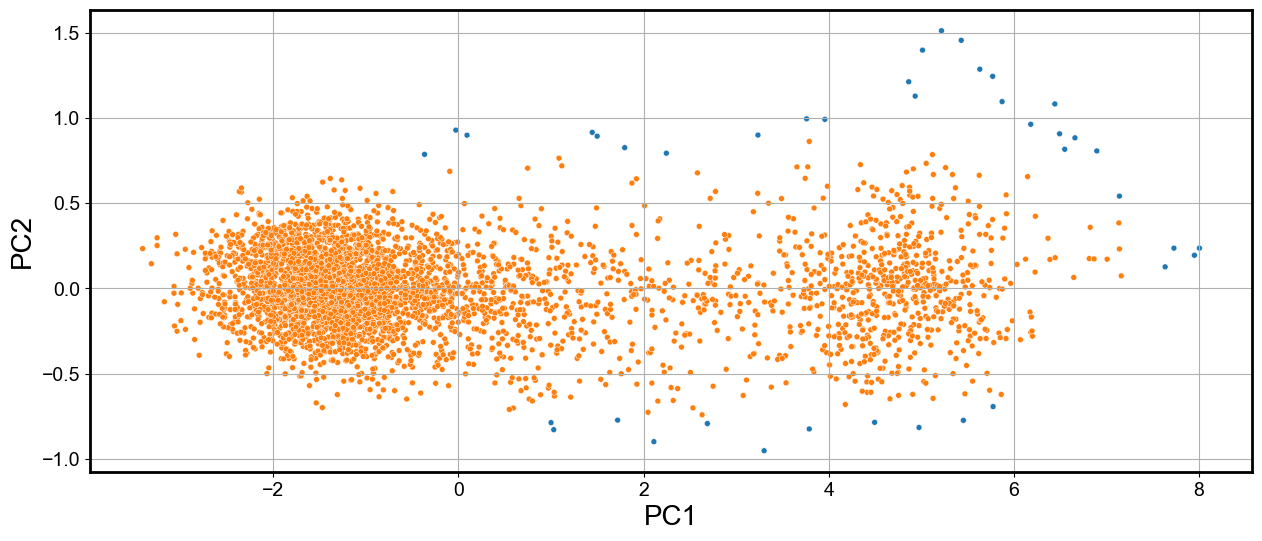

In [13]:
sns.scatterplot(data= labeled_data, x = "PC1", y = "PC2", hue = "classification", size = 1, legend=False)
plt.show()

We also have the 'score' column, which shows that the lower, the more abnormal a point is.

In [ ]:
fig = px.scatter(labeled_data, x = "PC1", y = "PC2", color="score")
fig.show()

In [ ]:

#cria o modelo com o nivel de contaminação igual a 3%
ifo.create_model(.03)

#retorna o dataset com duas novas colunas, uma com valores -1 e 1, -1 sendo as linhas cujo os dados são anomalias e 1 vice versa.
#a segunda coluna é o score de cada linha do data set, se o score for negativo, provavelmente a linha é uma anomalia
new_data = ifo.predict_anomalies(df)

In [ ]:
fig = px.scatter(new_data, x='PC1', y='PC2', color = "classification")
fig.show()